# Семинар 2

## pandas

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле "math_students.csv". Целевой переменной является итоговая оценка студента за курс.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# магическая функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

Загрузим данные и посмотрим на них.

In [2]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой
data = pd.read_csv('math_students.csv', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Аналогично, можно смотреть не на верхние строки таблицы, а на нижние:

In [3]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


В данном случае объектами являются студенты, признаками - различные их характеристики. Найдем число и тех, и других:

In [4]:
data.shape

(395, 33)

Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Для вывода названий всех признаков есть специальная функция:

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Как получить таблицу без последней колонки?

In [6]:
data[data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [7]:
data.iloc[:, :-1].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [15]:
data.loc[:, data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


Посмотрим, есть ли в данных пропуски:

In [6]:
data.isnull().any().any()

False

Итак, пропусков нет.

Можно вывести статистику по значениям признаков:

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Более подробное описание значений признаков (количество непустых значений, типов столбцов и объема занимаемой памяти):

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Какие значения принимает признак `guardian`?

In [16]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [19]:
data['guardian'].nunique()

3

In [17]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:

In [22]:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15


Работа с признаками - очень важный этап решения задачи. Помимо имеющихся признаков, можно создавать новые, которые могут оказаться полезными для построения качественного алгоритма. Например, внимательно изучив описания признаков, связанных с алкоголем, создадим признак "alc", который будет отражать общее употребление алкоголя в течение недели по формуле ниже:

$$
alc = \frac{5\times Dalc + 2 \times Walc}{7}
$$

In [23]:
data['alc'] = (5 * data['Walc'] + 2 * data['Dalc']) / 7

In [24]:
data[['Walc', 'Dalc', 'alc']].head()

,Walc,Dalc,alc
0,1,1,1.000000
1,1,1,1.000000
2,3,2,2.714286
3,1,1,1.000000
4,2,1,1.714286


Проанализируем взаимосвязь употребления алкоголя и успехов в учебе детальнее. Посмотрим на распределение употребления алкоголя у студентов:

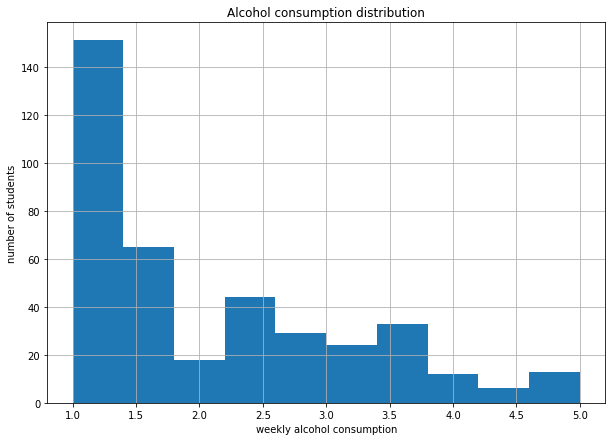

In [49]:
plt.figure(figsize=(10,7))
plt.title('Alcohol consumption distribution')
data['alc'].hist()
plt.xlabel('weekly alcohol consumption')
plt.ylabel('number of students')
plt.show()

Посмотрим на среднее употребление алкоголя:

In [26]:
data['alc'].mean()

2.0596745027124737

Итак, из гистограммы и полученного значения можно сделать вывод, что в среднем студенты употребляют алкоголь относительно редко. Теперь посмотрим на влияние употребления алкоголя в выходные и будни на итоговую оценку. Для этого разделим студентов на две части: те, чье употребление алкоголя меньше среднего, и те, у кого оно не меньше среднего. Начнем с выходных.

In [27]:
weekend_sober = data[data['Walc'] < data['Walc'].mean()]
weekend_drunk = data[data['Walc'] >= data['Walc'].mean()]

In [28]:
weekend_sober.shape, weekend_drunk.shape

((236, 34), (159, 34))

Посчитаем среднее значение целевой переменной для каждой части.

In [29]:
weekend_sober_g3 = weekend_sober['G3'].mean()
weekend_drunk_g3 = weekend_drunk['G3'].mean()
print(weekend_sober_g3, weekend_drunk_g3)

10.5 10.28930817610063


Итак, средние оценки примерно одинаковы - у тех, кто употребляет больше алкоголя в выходные, она чуть хуже. Теперь перейдем к будним дням.

In [30]:
workday_sober = data[data['Dalc'] < data['Dalc'].mean()]
workday_drunk = data[data['Dalc'] >= data['Dalc'].mean()]

In [31]:
workday_sober.shape, workday_drunk.shape

((276, 34), (119, 34))

In [32]:
workday_sober_g3 = workday_sober['G3'].mean()
workday_drunk_g3 = workday_drunk['G3'].mean()
print(workday_sober_g3, workday_drunk_g3)

10.731884057971014 9.680672268907562


По сравнению с выходными, разница между средними оценками сильно увеличилась и стала больше одного балла.

Из подобного краткого анализа можно сделать предварительное предположение (которое, разумеется, нужно еще статистически проверить) о том, что алкоголь влияет на успехи в учебе: те, кто употребляет больше алкоголя в будние дни, учится хуже, чем те, кто лучше себя в этом плане контролирует. Это наблюдение можно интерпретировать: в будни учеба особенно интенсивна, поэтому употребление алкоголя в эти дни мешает учиться, в отличие от выходных, когда можно отдохнуть.

Также данные можно исследовать с помощью группировки и агрегирования. Например, найдем исследуем закономерности, связанные с разными школами. Сгруппируем объекты по школам:

In [33]:
data_by_school = data.groupby('school')
data_by_school.describe()

Dalc                                                Fedu            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
school                                                                        
GP      349.0  1.444126  0.857959  1.0  1.0  1.0  2.0  5.0  349.0  2.553009   
MS       46.0  1.760870  1.078781  1.0  1.0  1.0  2.0  5.0   46.0  2.282609   

       ...  studytime      traveltime                                          \
       ...        75%  max      count      mean       std  min  25%  50%  75%   
school ...                                                                      
GP     ...        2.0  4.0      349.0  1.386819  0.666910  1.0  1.0  1.0  2.0   
MS     ...        2.0  3.0       46.0  1.913043  0.755015  1.0  1.0  2.0  2.0   

             
        max  
school       
GP      4.0  
MS      4.0  

[2 rows x 136 columns]

Теперь посмотрим на среднее значение признаков для каждой школы:

In [50]:
data_by_school.mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
school,,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971,2.027425
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826,2.304348


## Задания для самостоятельного решения

1. Верно ли, что студенты, имеющие больше 10 пропусков, учатся хуже, чем остальные?
2. Как вы думаете, какие еще признаки могут повлиять на итоговую оценку? Найдите закономерности, аналогичные рассмотренным.
3. Как вы думаете, если при школе откроется общежитие, насколько актуально это будет для студентов математического класса?
4. Найдите в данных закономерности с помощью группировки.

In [ ]:
# ̿̿ ̿̿ ̿̿ ̿'̿'\̵͇̿̿\з= ( ▀ ͜͞ʖ▀) =ε/̵͇̿̿/’̿’̿ ̿ ̿̿ ̿̿ ̿̿